# **Assignment 1**
* Team 6
* 24510099 Kim Dayeon
* 24510106 Park Jihyun
* 24510109 Lee Hanjong

## **1. Basic Domain Knowledge**

* Korea Electric Power Corporation (KEPCO) imposes electricity fees for a year based on the peak power usage during a three-month period in manufacturing facilities. Therefore, unintentional peak power surges in the manufacturing process lead to increased electricity costs, subsequently raising overall manufacturing expenses.
  * Peak power refers to the accumulated power measured over set time intervals through transformers installed in the factory.
* If fees are based on the maximum power used at specific moments—such as during equipment failures or the operation of large-capacity equipment—this can result in unfair charges for users. Therefore, an average power calculation over a designated period (15-minute intervals for KEPCO) is used to determine peak power.







## **2. Feature Descriptions & Main problems**

### **1) Feature Description**
1. 날짜(date) : Factory operation date
2. 시간(hour) : Factory operation time
3. 15분(min_15) : Peak electricity usage from 0 to 15 minutes
4. 30분(min_30) : Peak electricity usage from 15 to 30 minutes
5. 45분(min_45) : Peak electricity usage from 30 to 45 minutes
6. 60분(min_60) : Peak electricity usage from 45 to 60 minutes
7. 평균(average) : Average of the 15-minute, 30-minute, 45-minute, and 60-minute
8. 생산량(production) : Production volume
9. 기온(temperature) : Temperature
10. 풍속(wind_speed) : Wind speed
11. 습도(humidity) : Humidity
12. 강수량(precipitation) : Precipitation
13. 전기요금(electricity_cost) : Electricity rate
14. day : Day of the week
15. d : Day of the month
16. m : Month
17. 공정직원(factory_staff) : Production capacity of the factory
18. 인건비(labor_cost) : Ratio value for night and day labor costs

### **2) Main Problems**
1. Analyze the correlation between variables affecting peak demand power in the manufacturing process and identify the variables influencing peak demand power.
2. Predict energy consumption using various algorithms.

## **3. EDA**

In [ ]:
# 0. Install Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# 1. Read Dataset
df = pd.read_csv('./okm_augumented_2021.csv')
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


* The dataset information
  * column: total of 18
    * integer type: 날짜(date), 시간(hour), 15분(min_15), 30분(min_30), 45분(min_45), 60분(min_60), 평균(average), 생산량(production), day, d, m
    * float type: 기온(temperature), 풍속(wind_speed), 습도(humidity), 강수량(precipitation), 전기요금(electricity_cost), 공정직원(factory_staff), 인건비(labor_cost)
  * row: total of 6,168


In [ ]:
# 2. Data Preprocessing
df.isnull().sum()

날짜           0
시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          1
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

* The dataset has missing valuses
  * Wind Speed: 3 missing values
  * Precipitation: 1 missing values
  * Factory Staff: 17 missing values

In [ ]:
df_c = df.copy()

df_c.fillna(0, inplace =True)
df_c.isnull().sum()

날짜          0
시간          0
15분         0
30분         0
45분         0
60분         0
평균          0
생산량         0
기온          0
풍속          0
습도          0
강수량         0
전기요금(계절)    0
day         0
d           0
m           0
공장인원        0
인건비         0
dtype: int64

* All missing values replaced with 0.

In [ ]:
# Change Column Name to English
df_c.rename(columns={
    '날짜': 'date',
    '시간': 'hour',
    '15분': 'min_15',
    '30분': 'min_30',
    '45분': 'min_45',
    '60분': 'min_60',
    '평균': 'average',
    '생산량': 'production',
    '기온': 'temperature',
    '풍속': 'wind_speed',
    '습도': 'humidity',
    '강수량': 'precipitation',
    '전기요금(계절)': 'electricity_cost',
    'day': 'day',
    'd': 'd',
    'm': 'm',
    '공장인원': 'factory_staff',
    '인건비': 'labor_cost'
}, inplace=True)

* All column names changed to English.

### **Box Plot**

In [ ]:
df_c.describe()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,wind_speed,humidity,precipitation,electricity_cost,day,d,m,factory_staff,labor_cost
count,6.168000e+03,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,2.021049e+07,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.062630,70.098735,2.243888,162.757198,4.003891,15.256809,4.770428,0.898851,1.313959
std,2.447756e+02,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164724,22.996164,9.612754,30.820855,2.006957,8.799601,2.452431,1.983335,0.241700
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.021031e+07,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,2.021051e+07,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.111111,1.500000
75%,2.021071e+07,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.160310,1.500000
max,2.021091e+07,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


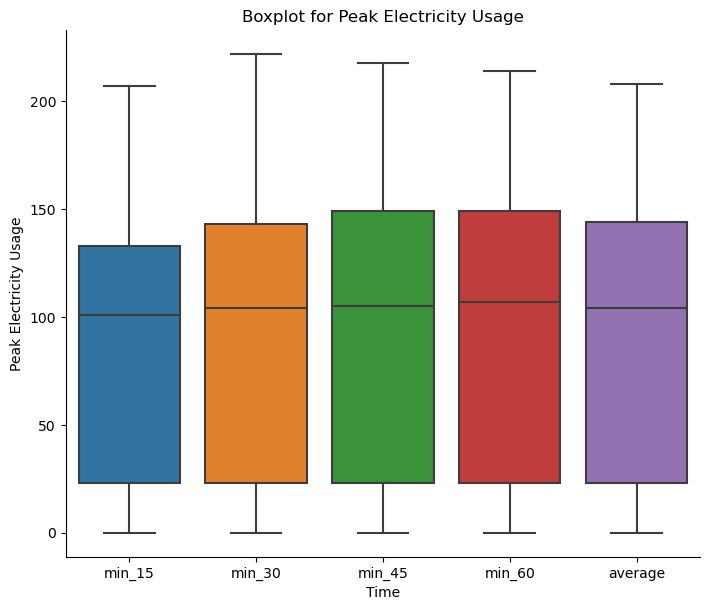

In [ ]:
# Reshape the Peak Electricity Usage columns
peak_usage_columns = ['min_15', 'min_30', 'min_45', 'min_60', 'average']
df_c_peaks_usage = df_c[peak_usage_columns].melt(var_name="Time", value_name="Peak Electricity Usage")

# Create boxplot
sns.catplot(data=df_c_peaks_usage, x="Time", y="Peak Electricity Usage", kind="box", height=6, aspect=1.2)
plt.title("Boxplot for Peak Electricity Usage")
plt.ylabel("Peak Electricity Usage")
plt.show()

* The boxplot for peak electricity usage:
  * The median is around 100 for all peak electricity usage, and shows slightly higher min_60 values.
  * The IQR is similar across all peak electricity usage.
  * There are no outliers.
  * There is no significant difference in peak power usage across different time intervals.

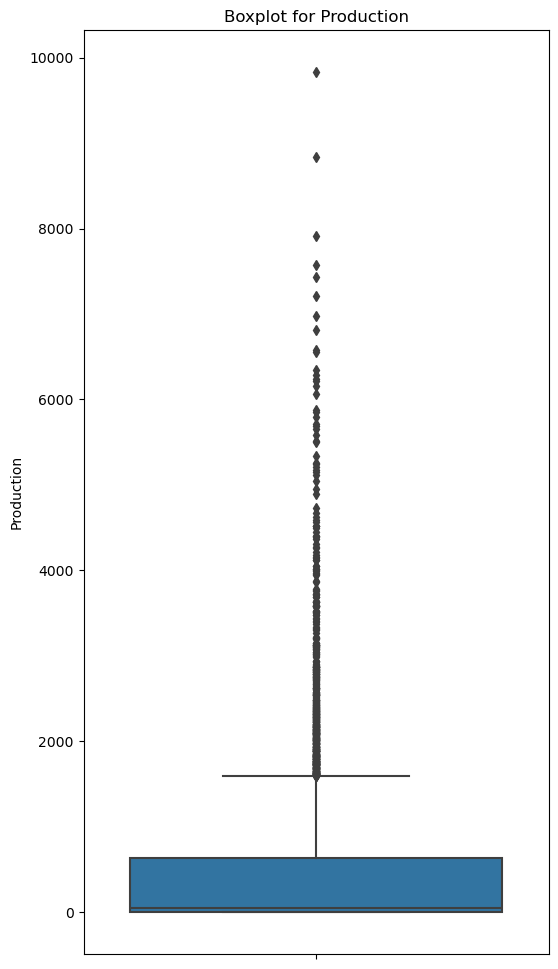

In [ ]:
# Product columns boxplot
plt.figure(figsize=(6, 12))
sns.boxplot(data=df_c, y='production')
plt.title("Boxplot for Production")
plt.ylabel("Production")
plt.show()

* The boxplot for Production:
  * The median is close to 0.
  * But indicating many outliers.

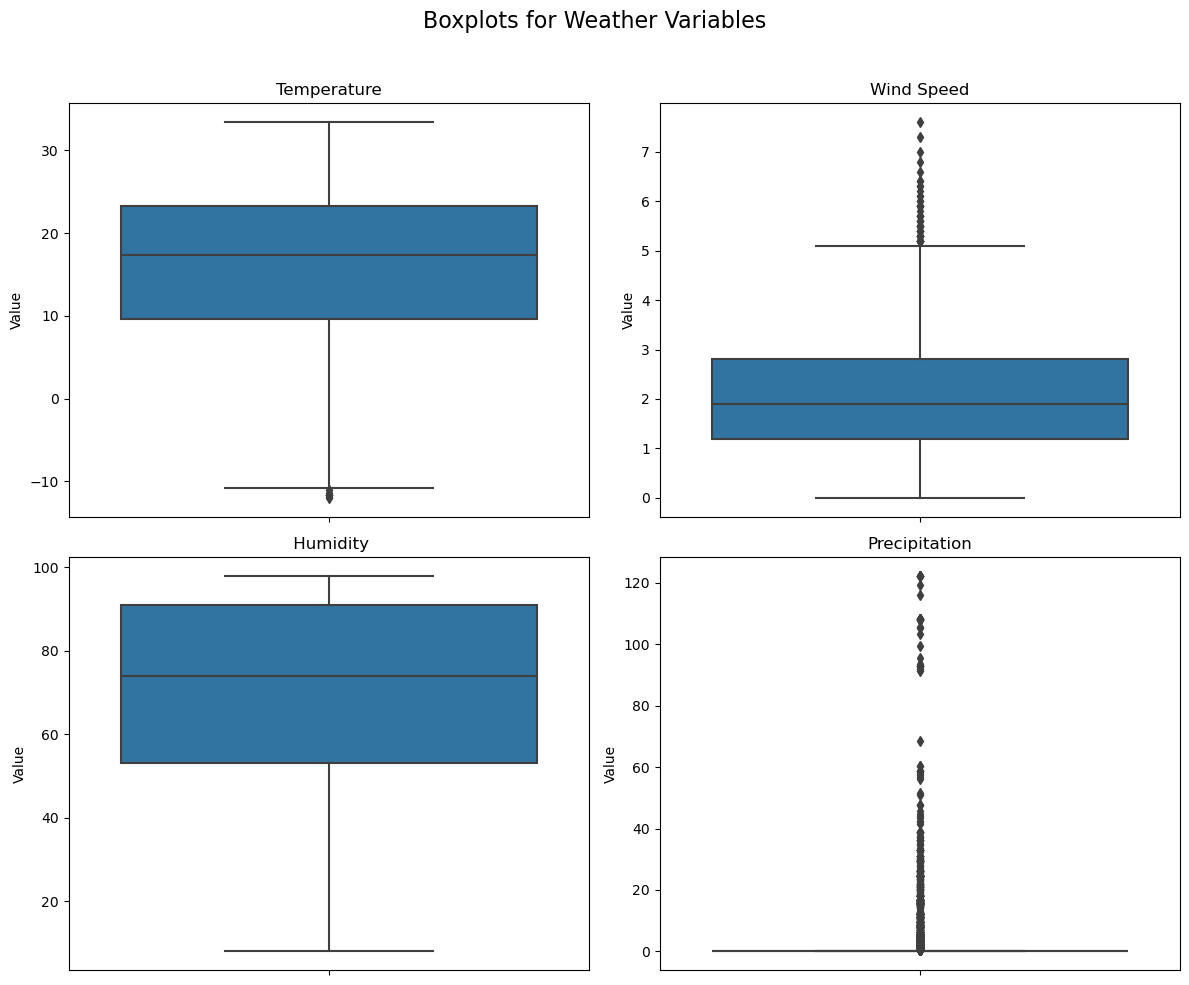

In [ ]:
# Reshape the Weather columns
weather_columns = ['temperature', 'wind_speed', 'humidity', 'precipitation']

# Set up Subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Boxplots for Weather Variables", fontsize=16)

# Create boxplot
sns.boxplot(data=df_c, y='temperature', ax=axes[0, 0])
axes[0, 0].set_title("Temperature")
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel("Value")

sns.boxplot(data=df_c, y='wind_speed', ax=axes[0, 1])
axes[0, 1].set_title("Wind Speed")
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel("Value")

sns.boxplot(data=df_c, y='humidity', ax=axes[1, 0])
axes[1, 0].set_title(" Humidity")
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel("Value")

sns.boxplot(data=df_c, y='precipitation', ax=axes[1, 1])
axes[1, 1].set_title("Precipitation")
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel("Value")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* The boxplots for Weather Variables:
  * Wind Speed and Precipitation indicating many outliers.

### **Bar Chart**

In [ ]:
electricity_cost_counts = df_c['electricity_cost'].value_counts().reset_index()
electricity_cost_counts.columns = ['electricity_cost', 'count']
electricity_cost_counts

,electricity_cost,count
0,167.2,2544
1,191.6,2208
2,109.8,1416


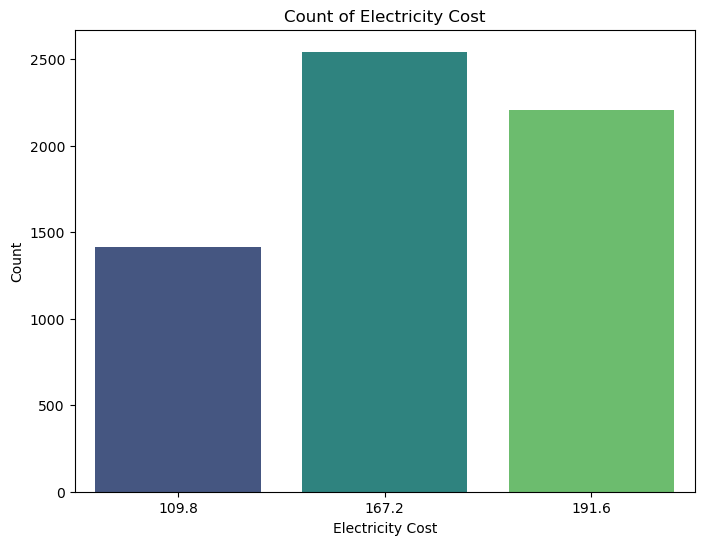

In [ ]:
# Electricity Cost Count Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=electricity_cost_counts, x='electricity_cost', y='count', palette='viridis')
plt.title("Count of Electricity Cost")
plt.xlabel("Electricity Cost")
plt.ylabel("Count")
plt.show()

*  The bar chart of Electricity Cost:
  * Spring(109.8), Summer(167.2) and Winter(191.6)
  * There appears to be a seasonal differene, with highter fees in winter and summer.

### **Histogram**

C:\Users\lg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


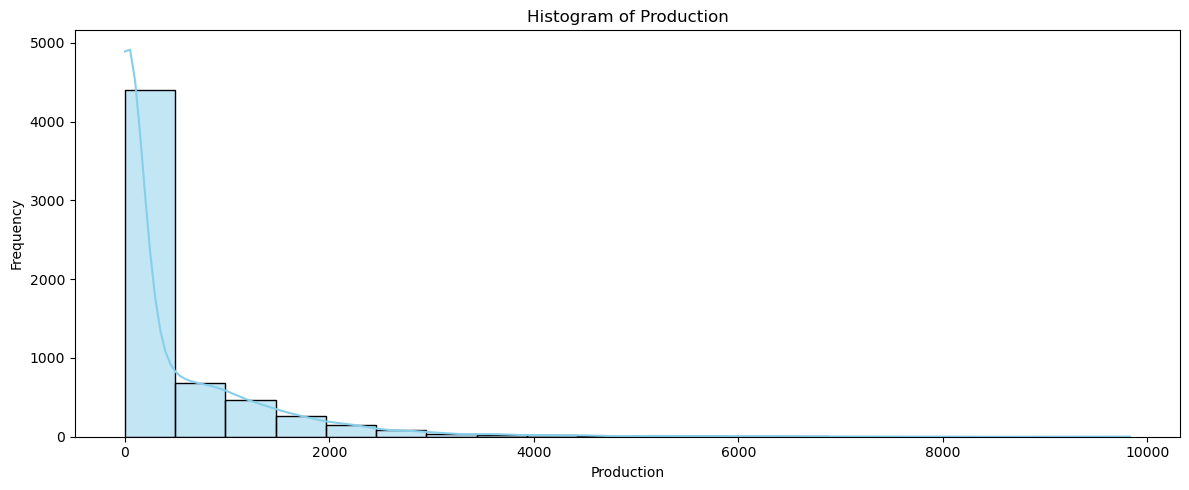

In [ ]:
# Production Histogram
plt.figure(figsize=(12, 5))

sns.histplot(df_c['production'], bins=20, kde=True, color='skyblue')
plt.title("Histogram of Production")
plt.xlabel("Production")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* The histogram of Production:
  * The value is primarily concentrated around 0.

C:\Users\lg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

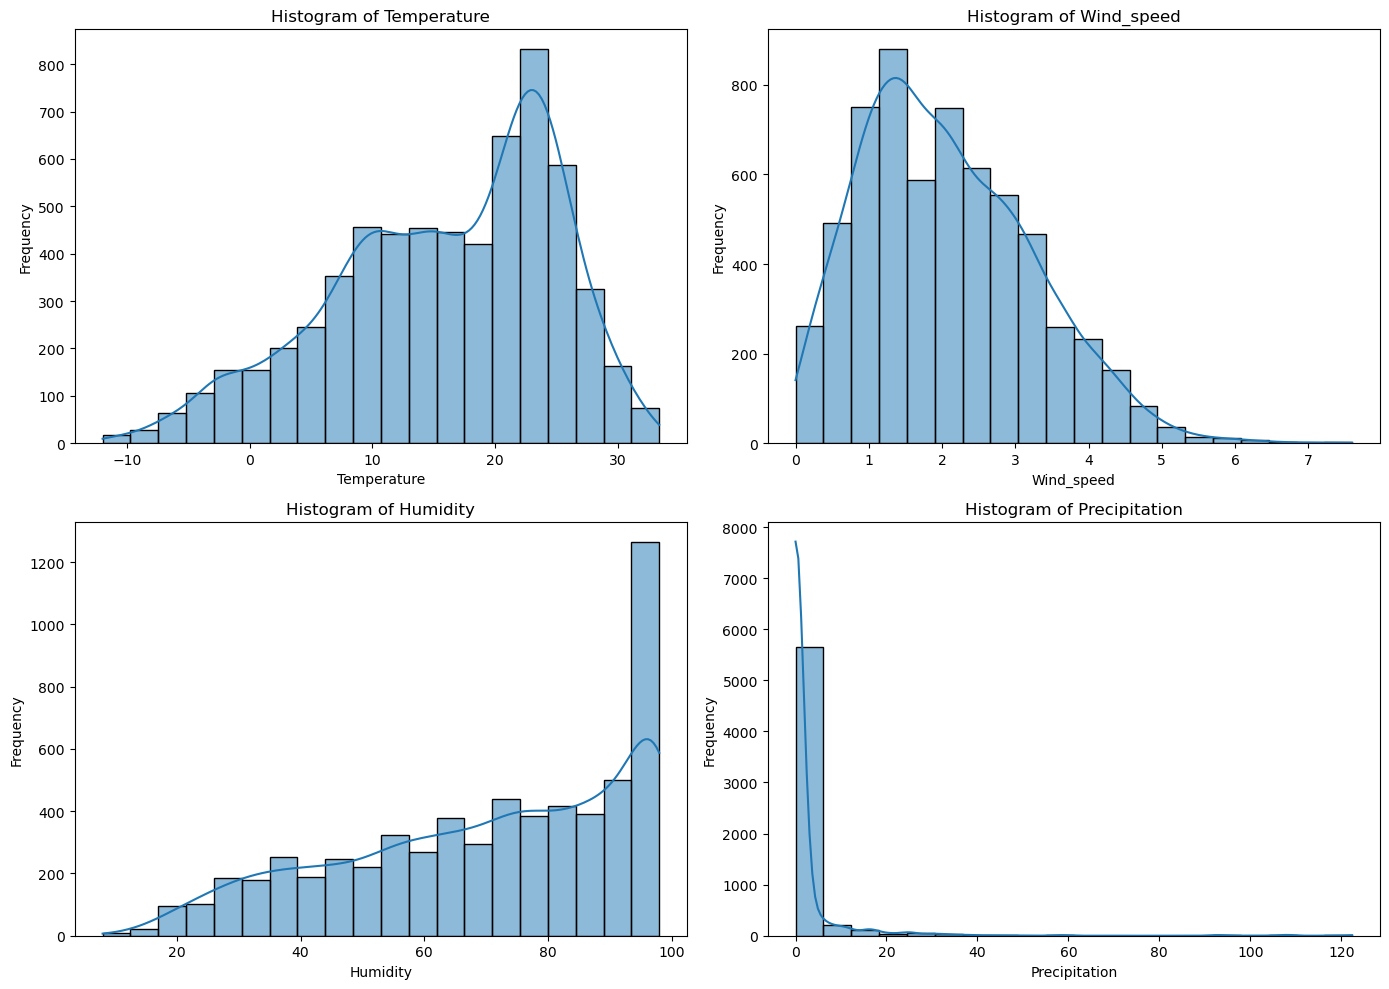

In [ ]:
# Weather Histogram
plt.figure(figsize=(14, 10))

for i, var in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_c[var], bins=20, kde=True)
    plt.title(f"Histogram of {var.capitalize()}")
    plt.xlabel(var.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* The histograms for Weather Variables:
  * **Temperature**: The histogram is skewed to the right, with the highest frequency in the 22-24 range.
  * **Wind Speed**: The histogram is skewed to the left, with the highest frequency close to 1.5.
  * **Humidity**: The highest frequency is close to 100.
  * **Precipitation**: The highest frequency is close to 0.

### **Heatmap**

In [ ]:
df_c.corr()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,wind_speed,humidity,precipitation,electricity_cost,day,d,m,factory_staff,labor_cost
date,1.000000,0.065435,0.035555,0.034746,0.037285,0.036244,0.036572,0.070719,0.863028,-0.268152,0.548722,0.160855,0.835836,-0.011838,-0.035210,0.999357,-0.002136,0.005469
hour,0.065435,1.000000,0.130084,0.124554,0.115947,0.097021,0.117865,0.031816,0.150262,0.009283,-0.030201,0.049157,0.067609,-0.036188,-0.010330,0.065681,0.012563,-0.034275
min_15,0.035555,0.130084,1.000000,0.980295,0.966859,0.950034,0.984688,0.520424,0.050760,0.115215,-0.085205,-0.008241,0.055881,-0.428312,0.052554,0.033601,0.295909,-0.202557
min_30,0.034746,0.124554,0.980295,1.000000,0.982443,0.959004,0.991255,0.515841,0.049524,0.114173,-0.084102,-0.010410,0.056203,-0.426674,0.055754,0.032679,0.288622,-0.195760
min_45,0.037285,0.115947,0.966859,0.982443,1.000000,0.984789,0.994774,0.513789,0.052818,0.115768,-0.082522,-0.013136,0.059044,-0.432957,0.056047,0.035203,0.286091,-0.211635
min_60,0.036244,0.097021,0.950034,0.959004,0.984789,1.000000,0.984828,0.499723,0.055651,0.128605,-0.090875,-0.014812,0.057878,-0.437576,0.056354,0.034153,0.276778,-0.243434
average,0.036572,0.117865,0.984688,0.991255,0.994774,0.984828,1.000000,0.517948,0.052996,0.119837,-0.086508,-0.011759,0.058096,-0.436280,0.055824,0.034499,0.289860,-0.215982
production,0.070719,0.031816,0.520424,0.515841,0.513789,0.499723,0.517948,1.000000,0.117780,0.115691,-0.109503,0.008171,0.068930,-0.259129,0.044836,0.068976,0.785115,-0.280625
temperature,0.863028,0.150262,0.050760,0.049524,0.052818,0.055651,0.052996,0.117780,1.000000,-0.192121,0.401553,0.118524,0.809825,0.010130,0.108487,0.857490,0.030540,-0.184611
wind_speed,-0.268152,0.009283,0.115215,0.114173,0.115768,0.128605,0.119837,0.115691,-0.192121,1.000000,-0.440112,0.048412,-0.254750,0.004037,-0.010588,-0.267261,0.088944,-0.350115


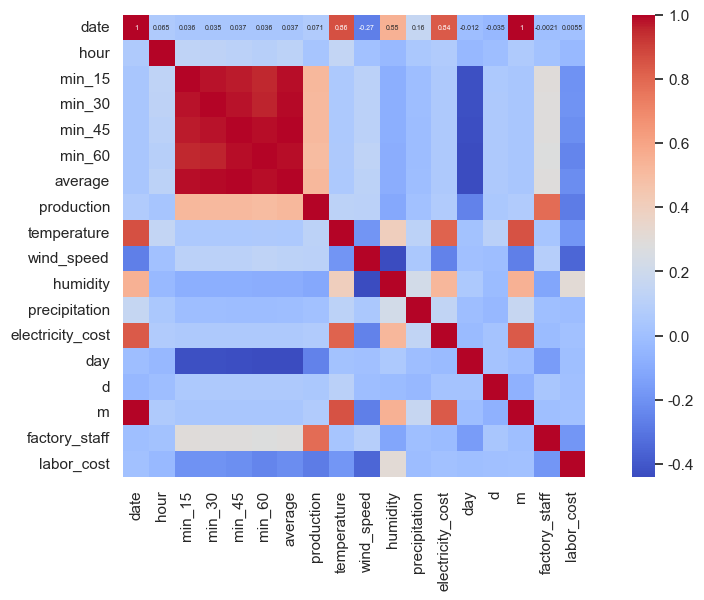

In [ ]:
sns.set(rc = {"axes.unicode_minus" : False}, style ="darkgrid")
plt.figure(figsize=(12, 6))
sns.heatmap(df_c.corr(), vmax=1, square=True, annot=True, annot_kws={'size': 5}, cmap='coolwarm')
plt.show()

* The heatmap:
  * **Peaks Usage** : It is observed that min_16, min_30, min_45, min_60, and average have a strong positive correlation, with correlation values above 0.9.
  * **Production** and **Factory Staff**: The correlation coefficient is 0.79, indicating a strong positive correlation. This suggests that as the number of factory staff increases, production also tends to increase. It can be interpreted that the workforce has a significant impact on production levels.

  * **Electricity Cost** and **Temperature**: The correlation coefficient is 0.81, showing a trend where higher temperatures are associated with increased electricity cost. This implies a greater likelihood of increased power consumption during hot weather or summer. Therefore, temperature may significantly affect factory operations.

### **Scatter Plot**

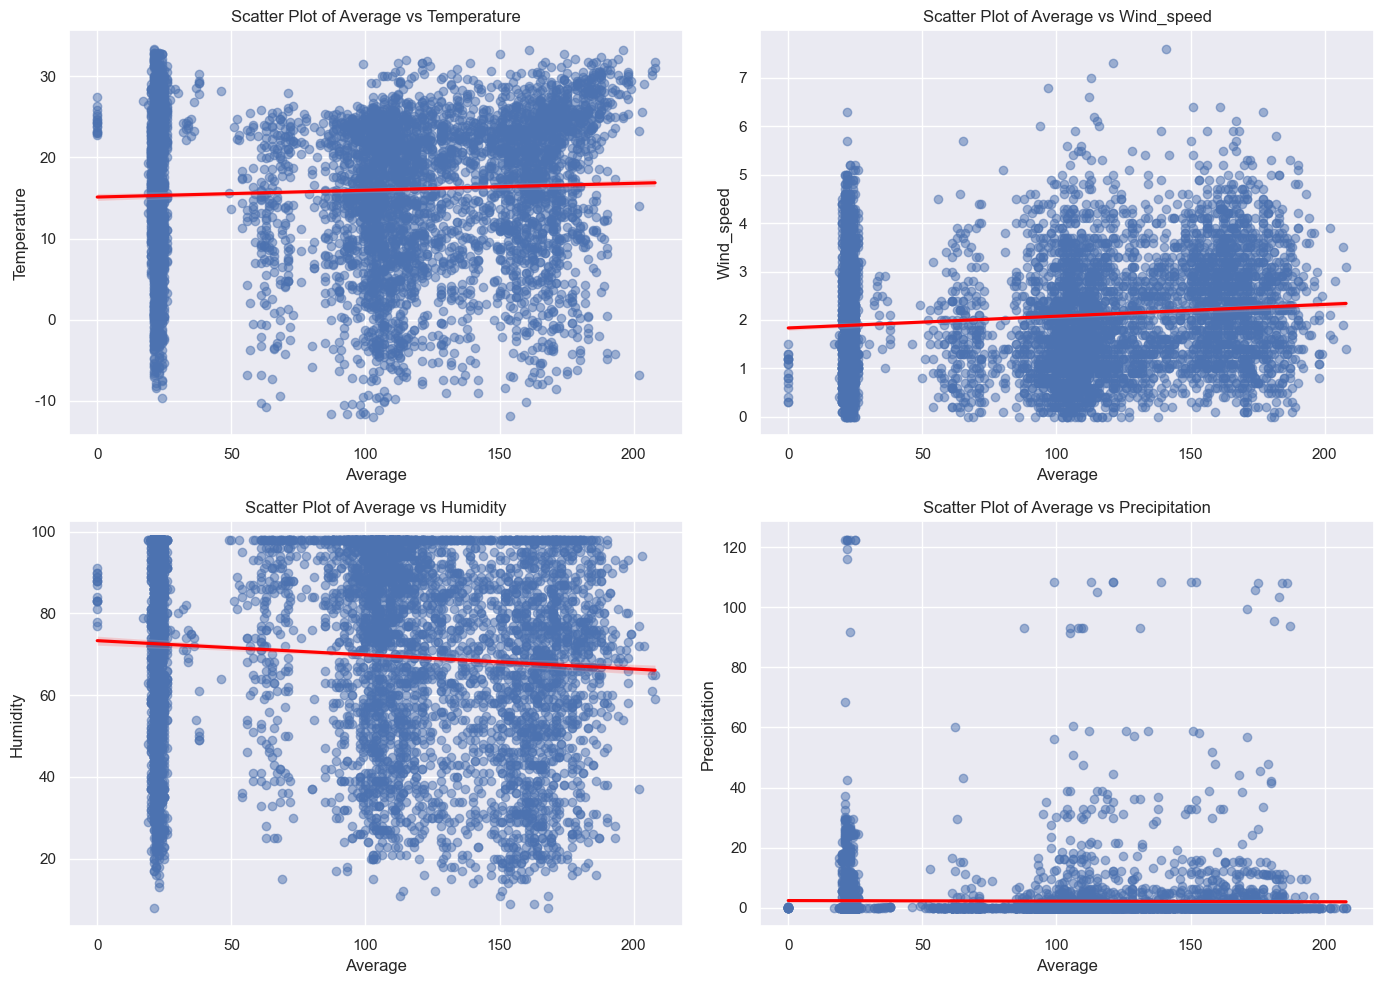

In [ ]:
# Scatter Plot the Weather columns
plt.figure(figsize=(14, 10))

for i, var in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x='average', y=var, data=df_c, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot of Average vs {var.capitalize()}')
    plt.xlabel('Average')
    plt.ylabel(var.capitalize())

plt.tight_layout()
plt.show()

* The scatter plot of Weather Variables:
  * For **Temperature**, **Wind Speed**, **Humidity**, and **Precipitation**, the slope of the regression line is minimal.
  * Observing the scatter plot distribution, it is difficult to conclude that there is a significant correlation among these variables.

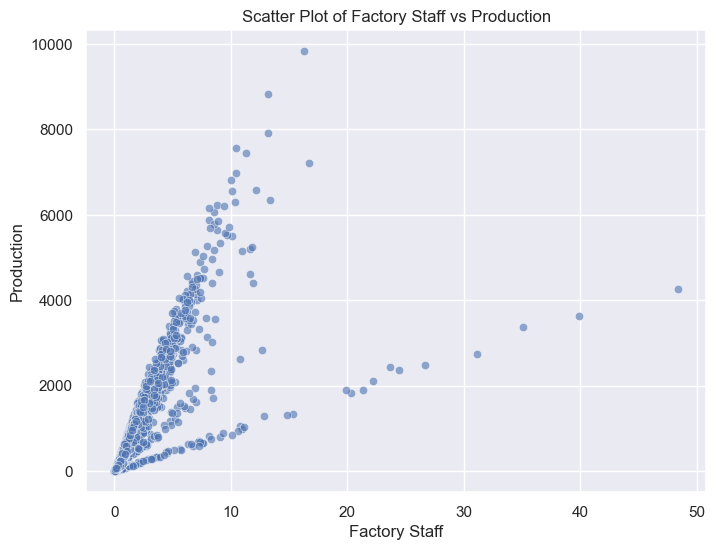

In [ ]:
# Factory Workers & Production Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_c, x='factory_staff', y='production', alpha=0.6)
plt.title("Scatter Plot of Factory Staff vs Production")
plt.xlabel("Factory Staff")
plt.ylabel("Production")
plt.show()

* The scatter plot of **Factory Staff** vs **Production**:
  * As the number of factory workers increases, there is a tendency for production volume to rise.

### **Line Chart**

In [ ]:
# Peak Electricity Usage in 2021
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
index_column

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-09-14 14:00:00', '2021-09-14 15:00:00',
               '2021-09-14 16:00:00', '2021-09-14 17:00:00',
               '2021-09-14 18:00:00', '2021-09-14 19:00:00',
               '2021-09-14 20:00:00', '2021-09-14 21:00:00',
               '2021-09-14 22:00:00', '2021-09-14 23:00:00'],
              dtype='datetime64[ns]', length=6168, freq='H')

In [ ]:
df_c_monthly_peaks_usage = df_c.drop(columns= ['date', 'hour', 'production', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'electricity_cost', 'day', 'd', 'm', 'factory_staff', 'labor_cost'])
df_c_monthly_peaks_usage.index = index_column
df_c_monthly_peaks_usage.index.names = ['Date']
df_c_monthly_peaks_usage.head()

,min_15,min_30,min_45,min_60,average
Date,,,,,
2021-01-01 00:00:00,62,61,61,61,61
2021-01-01 01:00:00,96,93,116,113,105
2021-01-01 02:00:00,106,96,106,107,104
2021-01-01 03:00:00,92,110,110,109,105
2021-01-01 04:00:00,108,105,106,108,107


In [ ]:
df_c_monthly_peaks_usage['min_15'] = [float(str(val).replace('.','').replace(',','.')) for val in df_c_monthly_peaks_usage['min_15'].values]
df_c_monthly_peaks_usage['min_30'] = [float(str(val).replace('.','').replace(',','.')) for val in df_c_monthly_peaks_usage['min_30'].values]
df_c_monthly_peaks_usage['min_45'] = [float(str(val).replace('.','').replace(',','.')) for val in df_c_monthly_peaks_usage['min_45'].values]
df_c_monthly_peaks_usage['min_60'] = [float(str(val).replace('.','').replace(',','.')) for val in df_c_monthly_peaks_usage['min_60'].values]
df_c_monthly_peaks_usage['average'] = [float(str(val).replace('.','').replace(',','.')) for val in df_c_monthly_peaks_usage['average'].values]
df_c_monthly_peaks_usage.head()

,min_15,min_30,min_45,min_60,average
Date,,,,,
2021-01-01 00:00:00,62.0,61.0,61.0,61.0,61.0
2021-01-01 01:00:00,96.0,93.0,116.0,113.0,105.0
2021-01-01 02:00:00,106.0,96.0,106.0,107.0,104.0
2021-01-01 03:00:00,92.0,110.0,110.0,109.0,105.0
2021-01-01 04:00:00,108.0,105.0,106.0,108.0,107.0


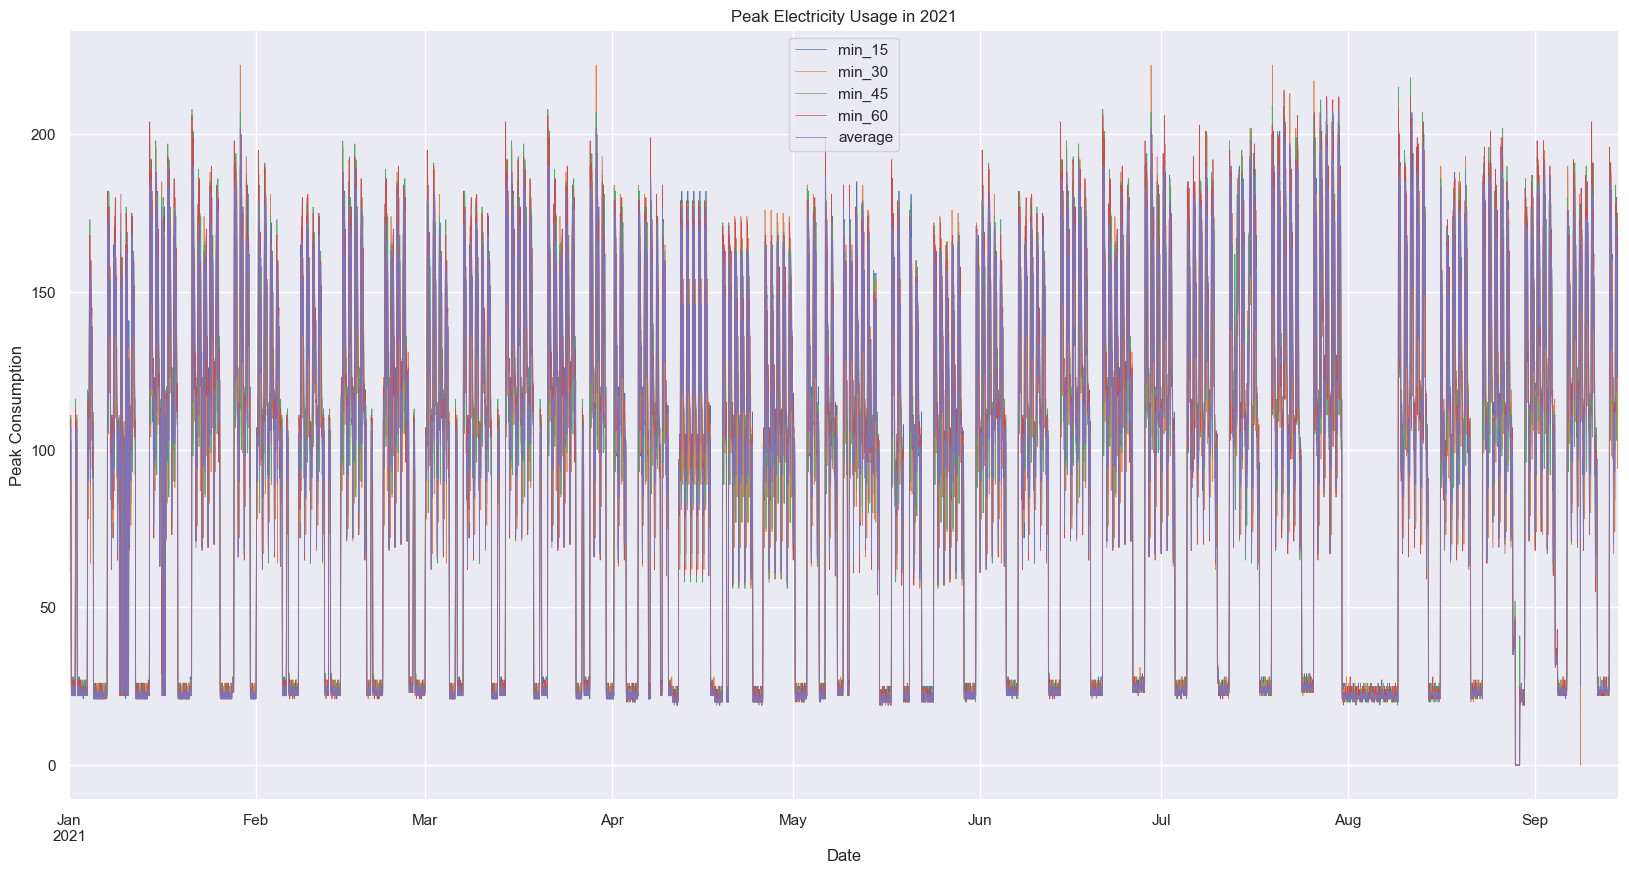

In [ ]:
# Create Line Chart
sns.set(rc = {"figure.figsize": (20, 10)})

df_c_monthly_peaks_usage.plot(linewidth = 0.5);
plt.title("Peak Electricity Usage in 2021")
plt.ylabel("Peak Consumption")
plt.show()

* The Peak Electricity Usage in 2021:
  * A decrease in peak power usage during August can be observed.

In [ ]:
df_c_monthly_production = df_c.drop(columns= ['date', 'hour', 'min_15', 'min_30', 'min_45', 'min_60', 'average', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'electricity_cost', 'day', 'd', 'm', 'factory_staff', 'labor_cost'])
df_c_monthly_production.index = index_column
df_c_monthly_production.index.names = ['Date']
df_c_monthly_production

# pivot table
monthly_production_pivot_table = df_c.pivot_table(
    index='m',
    values='production',
    aggfunc='mean'
)

monthly_production_pivot_table

,production
m,
1,260.501344
2,473.363095
3,410.224462
4,517.944444
5,499.887097
6,557.280556
7,530.127688
8,462.641129
9,537.988095


* The pivot table of Monthly Production:
  * The lowest value is observed in January, while the highest value is observed in June.

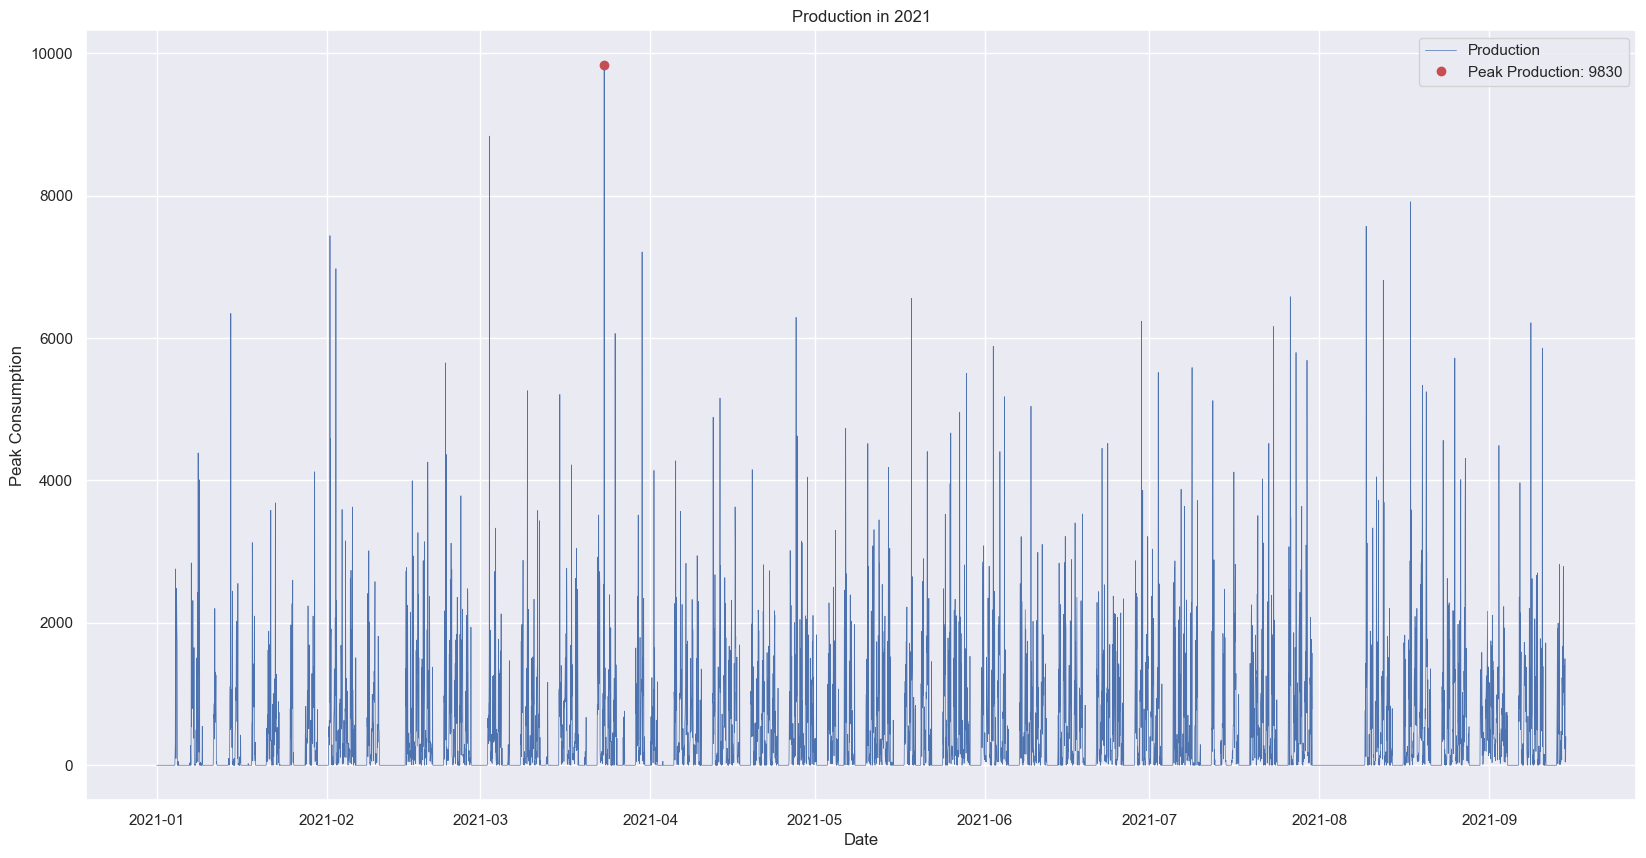

In [ ]:
# Create Line Chart
sns.set(rc={"figure.figsize": (20, 10)})
plt.plot(df_c_monthly_production.index, df_c_monthly_production['production'], linewidth=0.5, label="Production")

peak_production = df_c_monthly_production['production'].max()
peak_date = df_c_monthly_production['production'].idxmax()
plt.plot(peak_date, peak_production, 'ro', label=f"Peak Production: {peak_production}")

plt.title("Production in 2021")
plt.xlabel("Date")
plt.ylabel("Peak Consumption")
plt.legend()
plt.show()

* The Peak Electricity Usage in 2021:
  * The maximum production value is 9,830 in March.
  * Similar to peak power usage, production volume decreases in August.

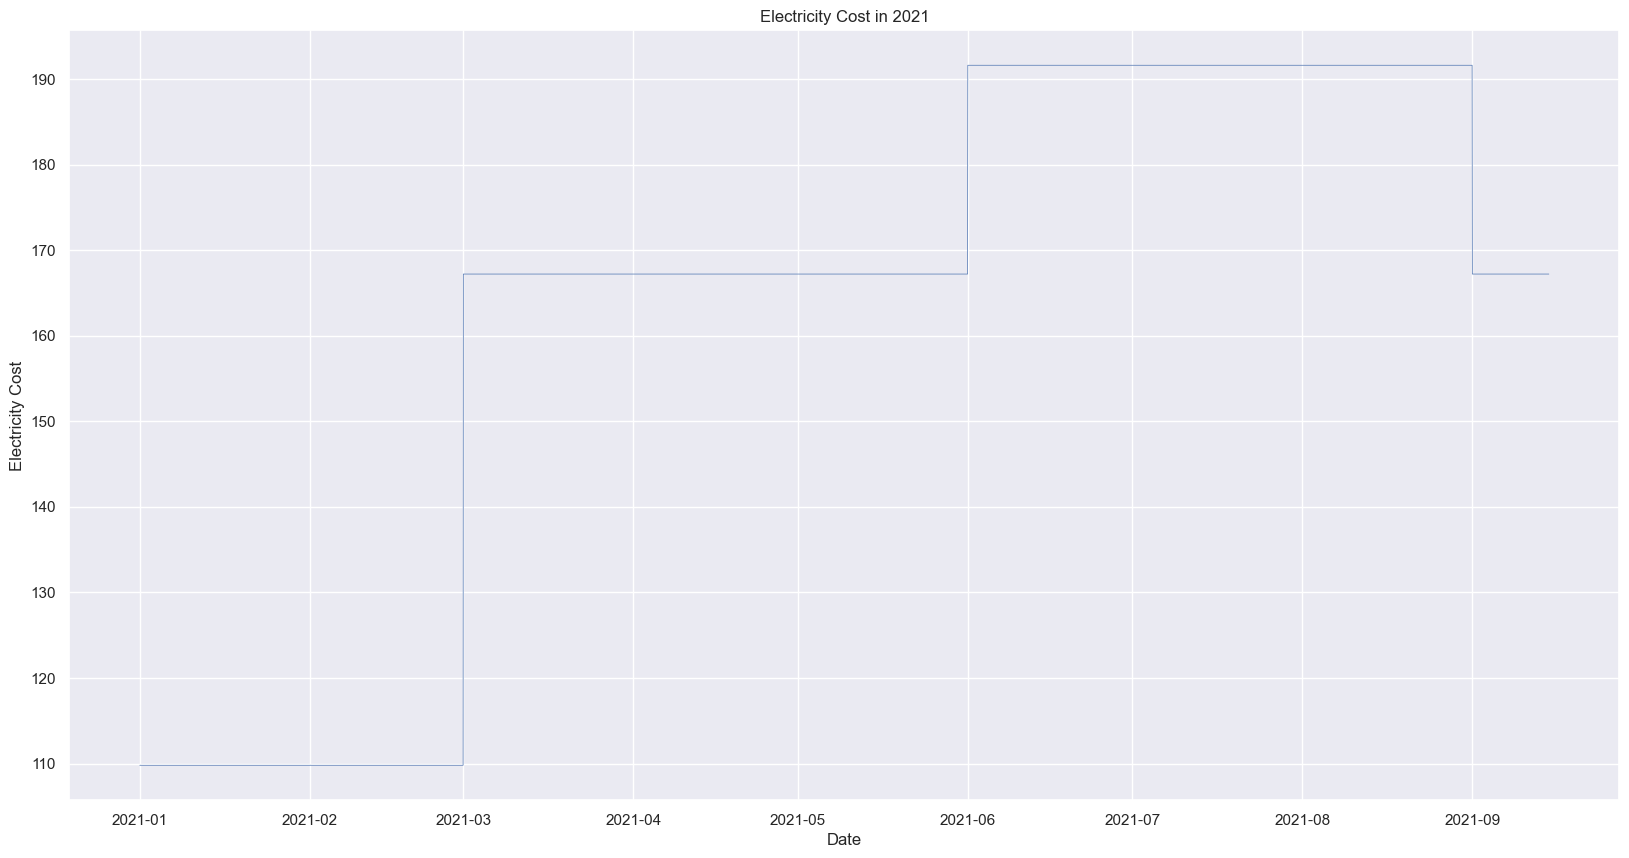

In [ ]:
df_c_monthly_electricity_cost = df_c.drop(columns= ['date', 'hour', 'min_15', 'min_30', 'min_45', 'min_60', 'average', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'production', 'day', 'd', 'm', 'factory_staff', 'labor_cost'])
df_c_monthly_electricity_cost.index = index_column
df_c_monthly_electricity_cost.index.names = ['Date']

# Create Line Chart
sns.set(rc={"figure.figsize": (20, 10)})
plt.plot(df_c_monthly_electricity_cost.index, df_c_monthly_electricity_cost['electricity_cost'], linewidth=0.5, label="Electricity Cost")

plt.title("Electricity Cost in 2021")
plt.xlabel("Date")
plt.ylabel("Electricity Cost")
plt.show()

* The line chart of Electricity Cost in 2021
  * It is categorized as 109.8, 167.2, and 191.6, similar to the bar chart.

In [ ]:
# Monthly Peak Electricity Usage
monthly_peak_usage_pivot_table = df_c.pivot_table(
    index='m',
    values=peak_usage_columns,
    aggfunc='mean'
)

monthly_peak_usage_pivot_table

,average,min_15,min_30,min_45,min_60
m,,,,,
1,83.317204,80.872312,82.880376,84.668011,84.588710
2,91.638393,89.084821,90.845238,93.077381,93.046131
3,99.931452,96.779570,99.217742,101.732527,101.633065
4,94.712500,91.079167,93.970833,96.493056,96.800000
5,86.065860,83.064516,85.432796,87.581989,87.685484
6,102.973611,99.633333,102.229167,104.786111,104.787500
7,103.700269,100.233871,102.637097,106.127688,105.314516
8,81.224462,78.791667,80.603495,82.501344,82.477151
9,102.294643,99.119048,101.366071,104.059524,104.226190


* The pivot table of Monthly Peak Electricity Usage:
  * Values are observed to be low in January, May and August.
  * In June, July, and September, the values increase.

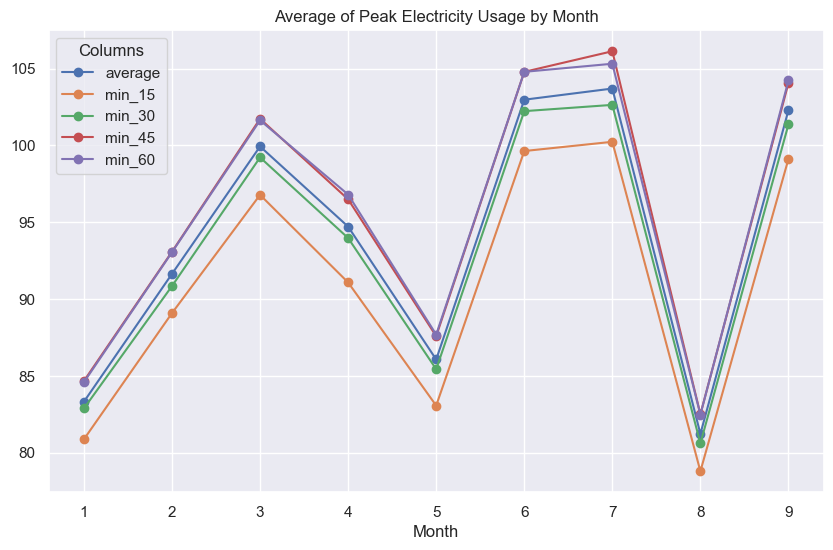

In [ ]:
# Create Line Chart
plt.figure(figsize=(10, 6))
for column in monthly_peak_usage_pivot_table.columns:
    plt.plot(monthly_peak_usage_pivot_table.index, monthly_peak_usage_pivot_table[column], marker='o', label=column)

plt.title("Average of Peak Electricity Usage by Month")
plt.xlabel("Month")
plt.legend(title="Columns")
plt.grid(True)
plt.show()

* The Average of Peak Electricity Usage by Month:
  * As observed in the pivot table, the average peak power usage in January, May, and August has decreased.

In [ ]:
# Weekend, Weekday
df_c_monthly_peaks_usage['Weekend'] = ((df_c_monthly_peaks_usage.index.dayofweek == 5) |
                                       (df_c_monthly_peaks_usage.index.dayofweek == 6)).astype(int)
df_c_monthly_average = df_c_monthly_peaks_usage.drop(columns= ['min_15', 'min_30', 'min_45', 'min_60'])
df_c_monthly_average

,average,Weekend
Date,,
2021-01-01 00:00:00,61.0,0
2021-01-01 01:00:00,105.0,0
2021-01-01 02:00:00,104.0,0
2021-01-01 03:00:00,105.0,0
2021-01-01 04:00:00,107.0,0
...,...,...
2021-09-14 19:00:00,153.0,0
2021-09-14 20:00:00,128.0,0
2021-09-14 21:00:00,128.0,0


In [ ]:
# pivot table
df_c_monthly_peaks_usage['Month'] = df_c_monthly_peaks_usage.index.month
df_c_monthly_average_pivot_table = df_c_monthly_peaks_usage.pivot_table(values='average', index='Month', columns='Weekend', aggfunc='mean')
df_c_monthly_average_pivot_table.columns = ['Weekday', 'Weekend']

df_c_monthly_average_pivot_table

,Weekday,Weekend
Month,,
1,81.704365,86.704167
2,114.252083,35.104167
3,107.572464,77.963542
4,117.157197,32.989583
5,107.559524,40.929167
6,127.541667,35.411458
7,132.613636,33.023148
8,102.846591,28.370370
9,129.187500,35.062500


* The pivot table of Monthly average peak power for weekends and weekdays.
  * Excluding January, it is observed that the average peak power usage on weekends is lower in all other months.

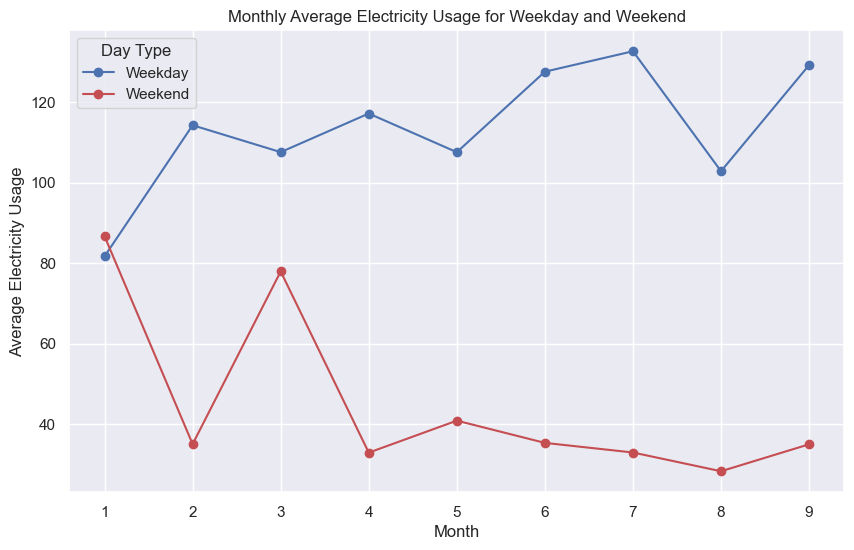

In [ ]:
# Create Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df_c_monthly_average_pivot_table.index, df_c_monthly_average_pivot_table['Weekday'], marker='o', color='b', label='Weekday')
plt.plot(df_c_monthly_average_pivot_table.index, df_c_monthly_average_pivot_table['Weekend'], marker='o', color='r', label='Weekend')

plt.title("Monthly Average Electricity Usage for Weekday and Weekend")
plt.xlabel("Month")
plt.ylabel("Average Electricity Usage")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

* The line chart of Monthly Average Electricity Usage for Weekday and Weekend:
  * As observed in the pivot table, the average peak power usage on weekends is lower in all months except January.

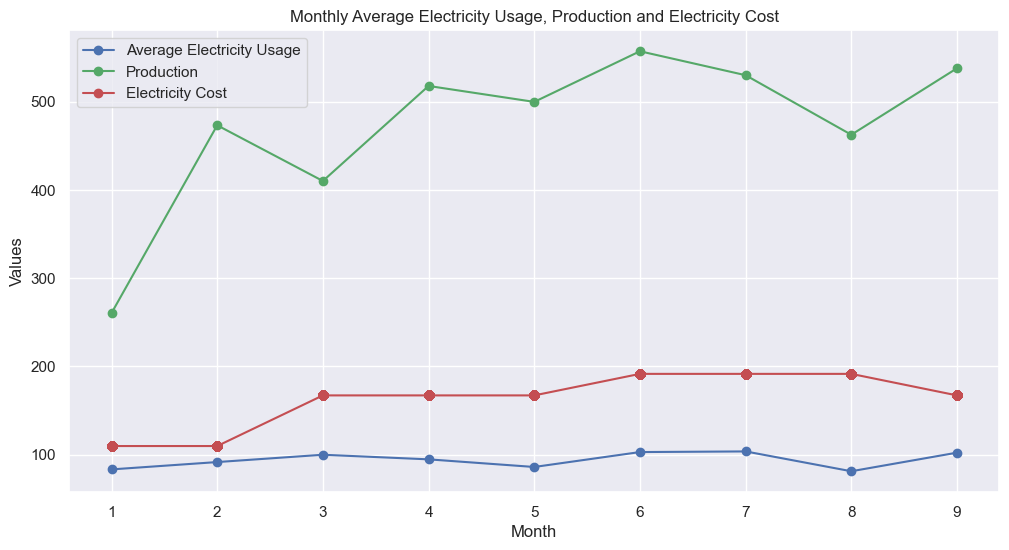

In [ ]:
# Create Line Chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_peak_usage_pivot_table.index, monthly_peak_usage_pivot_table['average'], marker='o', color='b', label='Average Electricity Usage')
plt.plot(monthly_production_pivot_table.index, monthly_production_pivot_table['production'], marker='o', color='g', label='Production')
plt.plot(df_c_monthly_electricity_cost.index.month, df_c_monthly_electricity_cost['electricity_cost'], marker='o', color='r', label="Electricity Cost")

plt.title("Monthly Average Electricity Usage, Production and Electricity Cost")
plt.xlabel("Month")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

* The line chart of Monthly Average Electricity Usage, Production and Electricity Cost:
  * Production shows significant monthly fluctuations, but average elelctricity usage and electricity cost remain relatively stable.
  * Changes in production do not appear to have a substantial impact on average elelctricity usage.